<a href="https://colab.research.google.com/github/Pavitrapanya/Fruit-Color-Prediction-Model/blob/main/Fruit_Color_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fruit Color Prediction Model** 


*BY PAVITRA CHADALAVADA*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**DATA INGESTION**

In [ ]:
df=pd.read_csv('/content/fruit_data_with_colors.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


**DATA VISUALIZATION**

In [ ]:
#Seperating the fruits to see corresponding correlations 
apple= df[df['fruit_label'] == 1]
mandarin=df[df['fruit_label'] == 2]
orange=df[df['fruit_label'] == 3]
lemon=df[df['fruit_label'] == 4]


Text(0.5, 1.0, 'Mass vs Width')

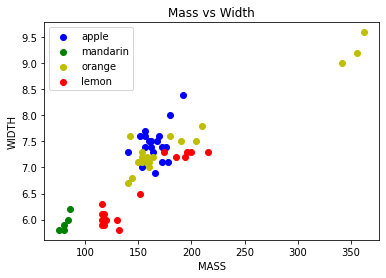

In [ ]:
plt.scatter(apple['mass'],apple['width'],color='b',label='apple')
plt.scatter(mandarin['mass'],mandarin['width'],color='g',label='mandarin')
plt.scatter(orange['mass'],orange['width'],color='y',label='orange')
plt.scatter(lemon['mass'],lemon['width'],color='r',label='lemon')
plt.legend()
plt.xlabel("MASS")
plt.ylabel("WIDTH")
plt.title("Mass vs Width")

Text(0.5, 1.0, 'Mass vs Height')

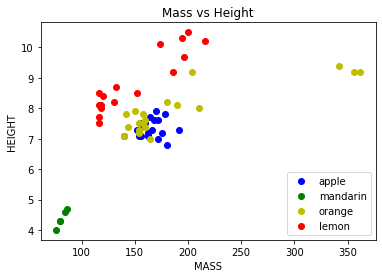

In [ ]:
plt.scatter(apple['mass'],apple['height'],color='b',label='apple')
plt.scatter(mandarin['mass'],mandarin['height'],color='g',label='mandarin')
plt.scatter(orange['mass'],orange['height'],color='y',label='orange')
plt.scatter(lemon['mass'],lemon['height'],color='r',label='lemon')
plt.legend()
plt.ylabel("HEIGHT")
plt.xlabel("MASS")
plt.title("Mass vs Height")

Text(0.5, 1.0, 'MASS vs COLOR_SCORE')

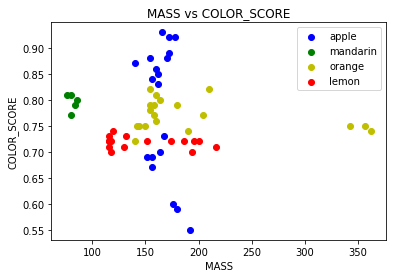

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(apple['mass'],apple['color_score'],color='b',label='apple')
plt.scatter(mandarin['mass'],mandarin['color_score'],color='g',label='mandarin')
plt.scatter(orange['mass'],orange['color_score'],color='y',label='orange')
plt.scatter(lemon['mass'],lemon['color_score'],color='r',label='lemon')
plt.legend()
plt.xlabel("MASS")
plt.ylabel("COLOR_SCORE")
plt.title("MASS vs COLOR_SCORE")

Text(0.5, 1.0, 'Height vs Width')

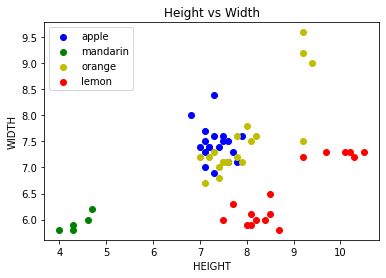

In [ ]:
plt.scatter(apple['height'],apple['width'],color='b',label='apple')
plt.scatter(mandarin['height'],mandarin['width'],color='g',label='mandarin')
plt.scatter(orange['height'],orange['width'],color='y',label='orange')
plt.scatter(lemon['height'],lemon['width'],color='r',label='lemon')
plt.legend()
plt.xlabel("HEIGHT")
plt.ylabel("WIDTH")
plt.title("Height vs Width")

**DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler =MinMaxScaler()
fruits_minmax_scaled = minmax_scaler.fit_transform(
    df.drop(["fruit_label","fruit_name","fruit_subtype"], axis=1)
)
fruits_df_scaled = pd.DataFrame(fruits_minmax_scaled, columns=df.columns[3:])
fruits_df_scaled.head()

,mass,width,height,color_score
0,0.405594,0.684211,0.507692,0.000000
1,0.363636,0.578947,0.430769,0.105263
2,0.349650,0.421053,0.492308,0.131579
3,0.034965,0.105263,0.107692,0.657895
4,0.027972,0.052632,0.092308,0.631579


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fruits_df_scaled,
                                                                   df["fruit_label"],
                                                                   test_size=0.2)
print(X_train.shape)
print(X_test.shape)
                                                                   

(47, 4)
(12, 4)


**Creating KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3
                           )
clf.fit(X_train, y_train)
accuracy_knn = clf.score(X_test, y_test)
print(accuracy_knn)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))


0.9166666666666666
Accuracy 0.9166666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3, 1, 0],
       [0, 5, 0],
       [0, 0, 3]])

**Creating Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logis_reg = LogisticRegression()
logis_reg.fit(X_train, y_train)
accuracy_logis = logis_reg.score(X_test, y_test)
print("Accuracy:",accuracy_logis)

Accuracy: 0.6666666666666666


In [ ]:
y_pred = logis_reg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[3, 1, 0],
       [2, 2, 1],
       [0, 0, 3]])

**Creating SVM Model**

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  75.00
F1 (Polynomial Kernel):  75.00


In [ ]:
confusion_matrix(y_test,poly_pred)

array([[3, 1, 0],
       [2, 3, 0],
       [0, 0, 3]])

**CREATING DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(X_train, y_train)
y_pred_train =classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy_tree))

Accuracy: 0.75


In [ ]:
confusion_matrix(y_test,y_pred_train)

array([[2, 2, 0],
       [0, 5, 0],
       [0, 1, 2]])

**Evaluation of multiple models**

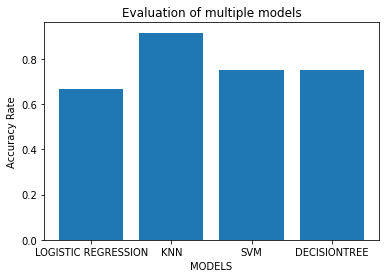

In [ ]:
model=['LOGISTIC REGRESSION','KNN','SVM','DECISIONTREE']
Acc=[accuracy_logis,accuracy_knn,poly_accuracy,accuracy_tree]
plt.bar(model,Acc)
plt.xlabel('MODELS')
plt.ylabel("Accuracy Rate")
plt.title("Evaluation of multiple models")
plt.show()

From the above graph it is clear that KNN has the highest accuracy,followed by Decision Tree, Support Vector Machine and lastly Logistic Regression.Therefore KNN is the most apt machine learning model for the given dataset.

---

